In [28]:
%run ./DataGen2.ipynb

plt.rcParams.update({'font.size': 18})

In [29]:
ID = 5

sigma_s = 32.0

In [30]:
folders = {1: 'standard',
          2: 'low_density',
          3: 'high_noise',
          4: 'different_densities',
          5: 'different_sizes',
          6: 'non_uniform_noise'}

NumberOfSimulations = 30
general_path = '/Users/Eliana/Documents/PDM/Codes/My_codes/Deviations_from_standard/'

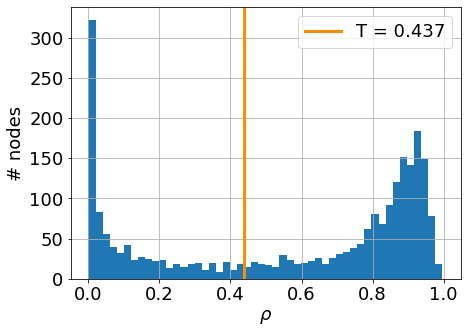

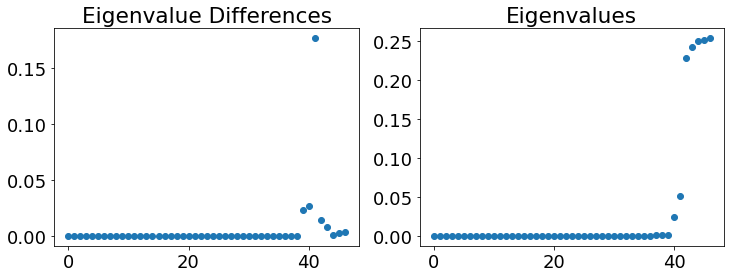

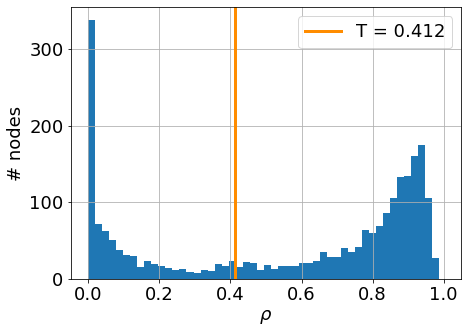

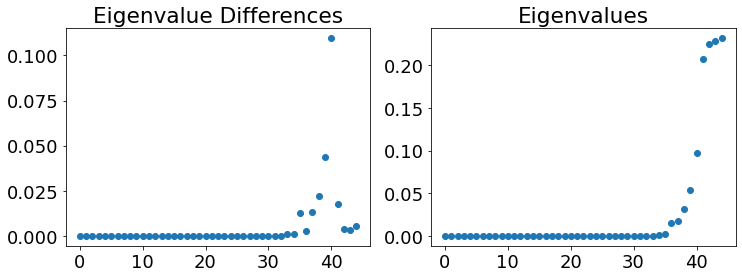

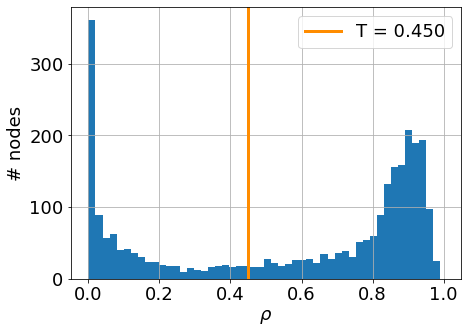

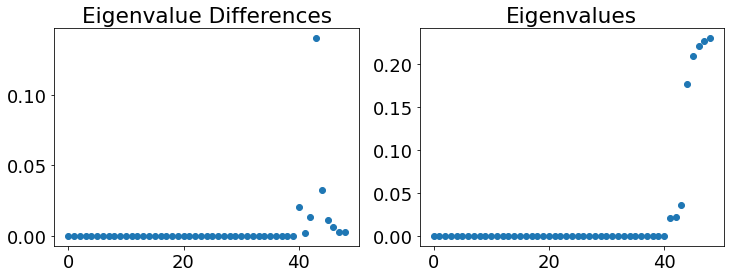

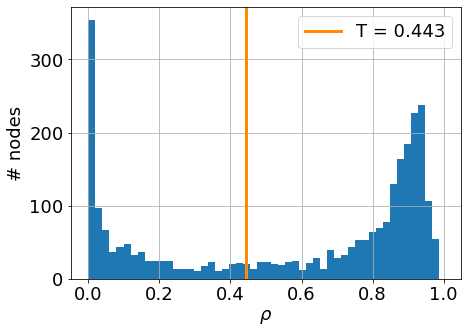

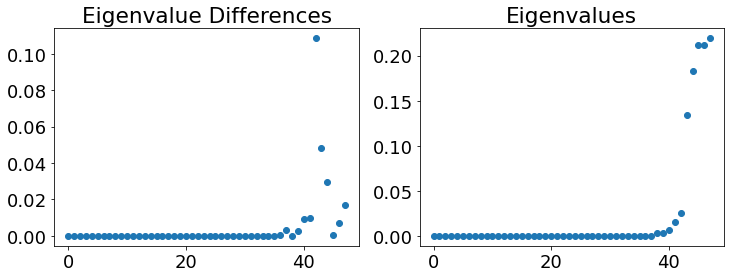

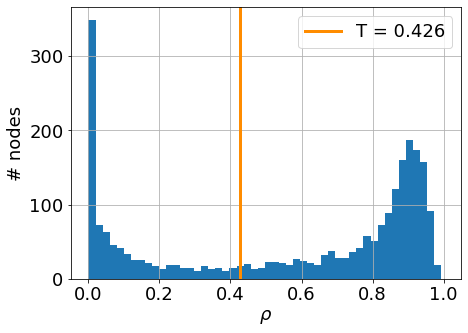

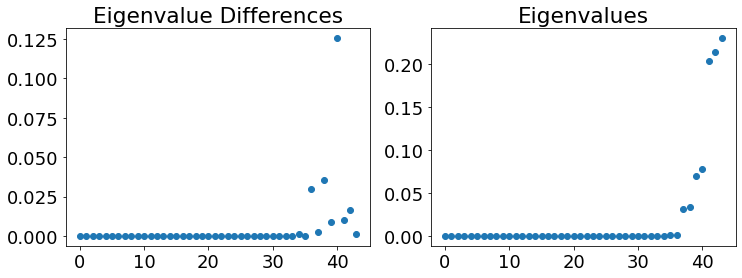

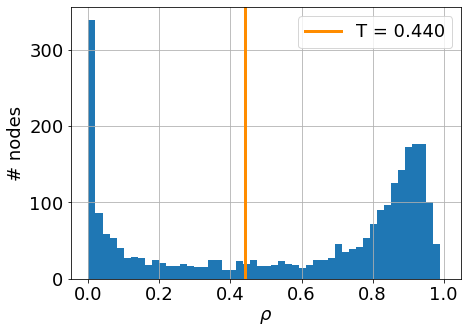

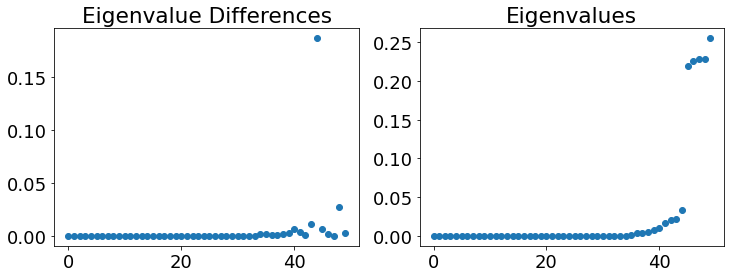

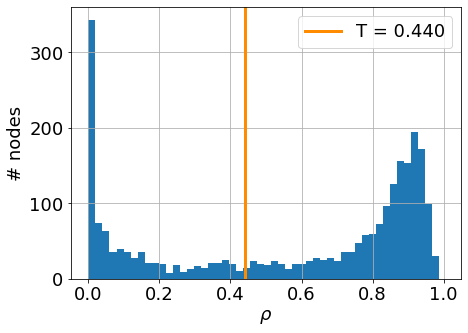

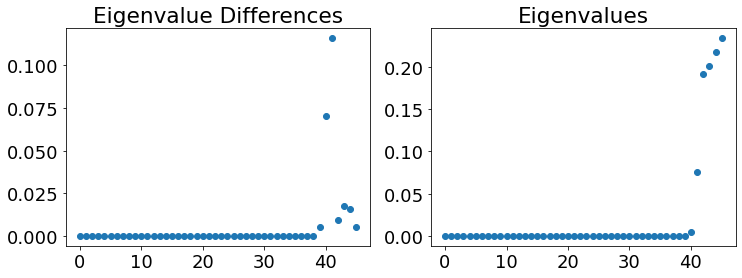

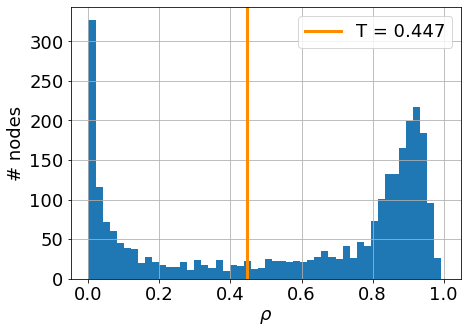

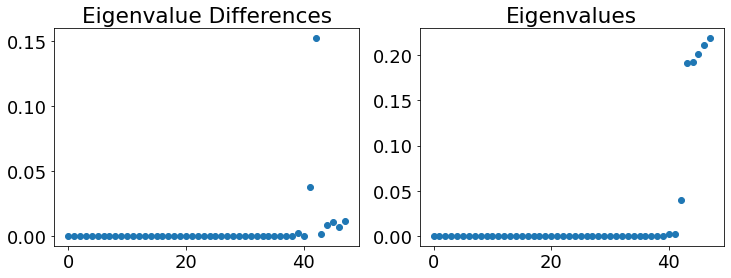

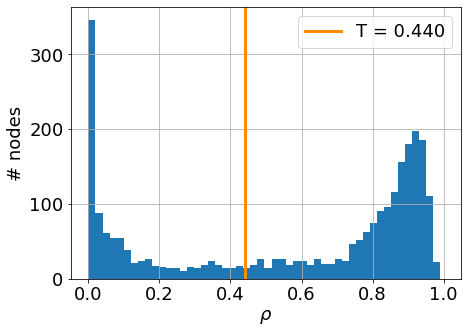

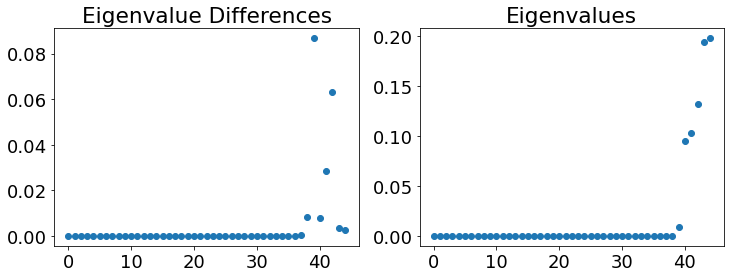

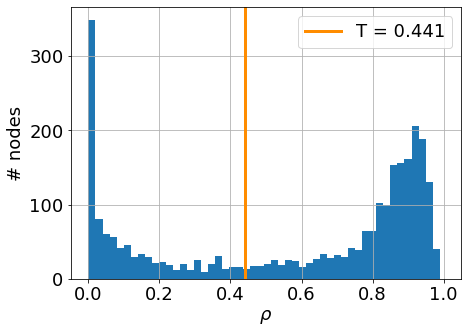

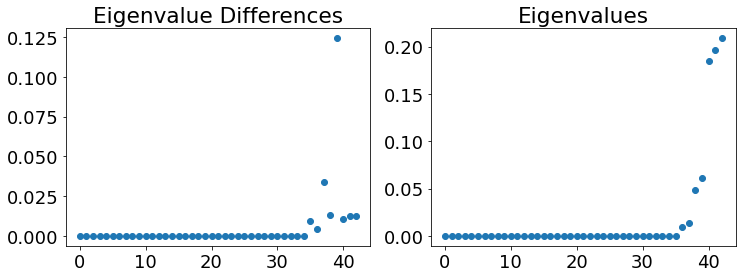

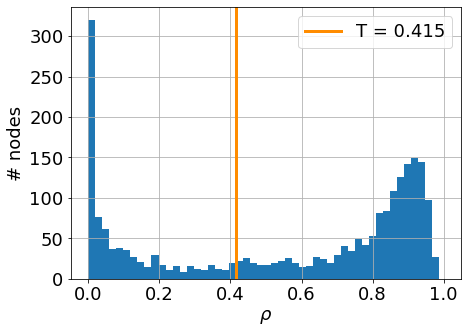

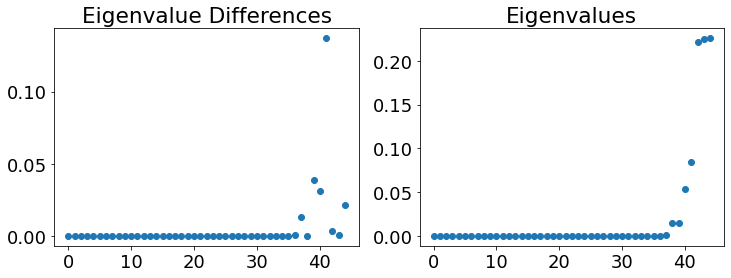

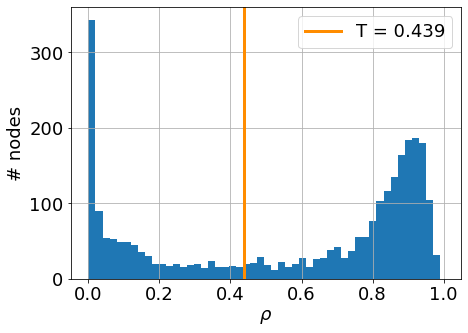

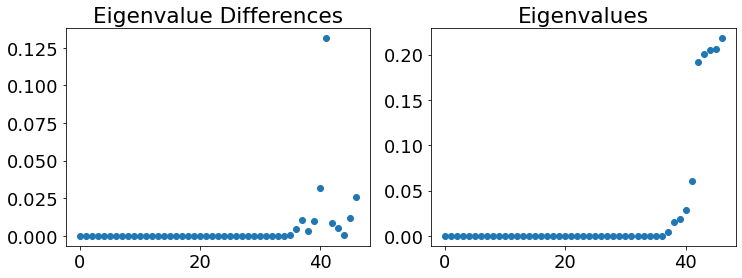

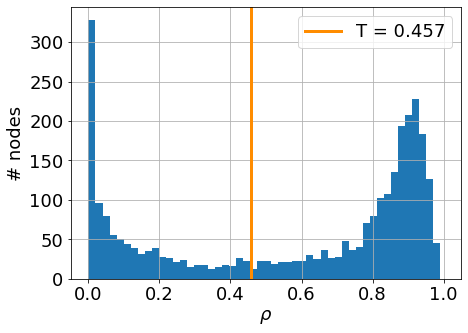

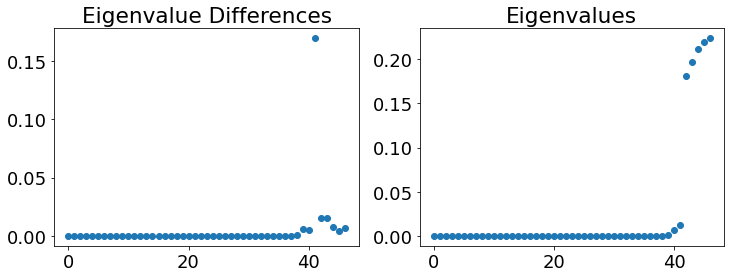

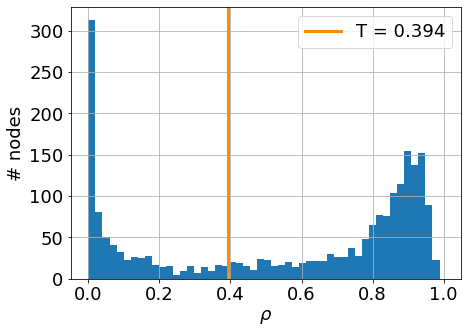

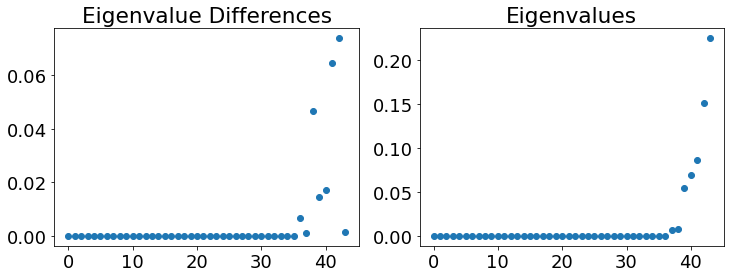

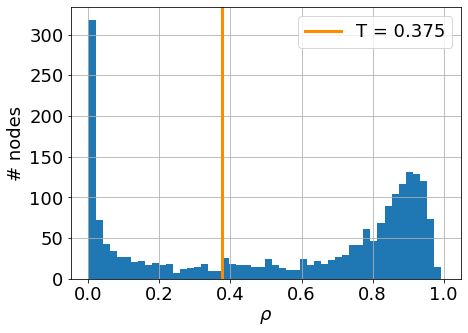

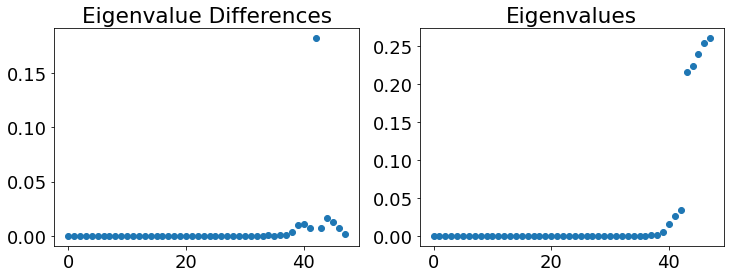

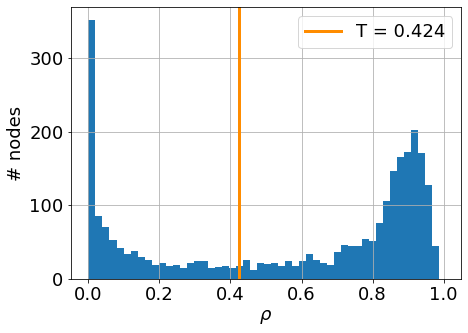

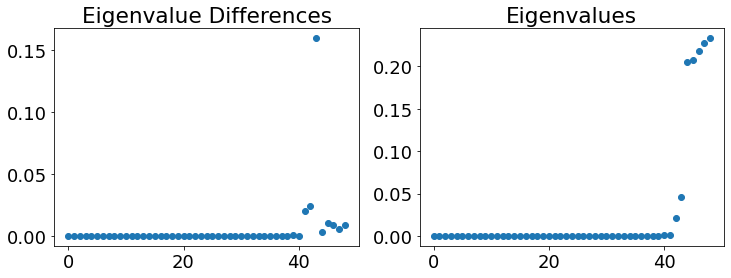

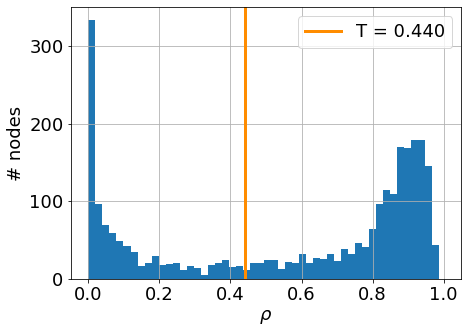

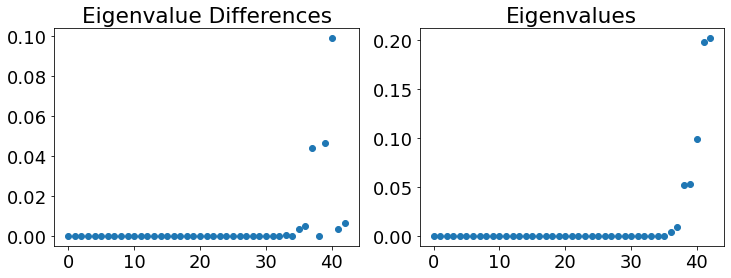

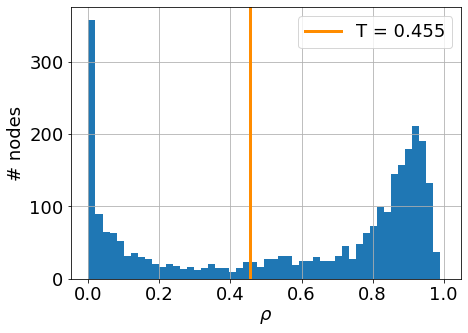

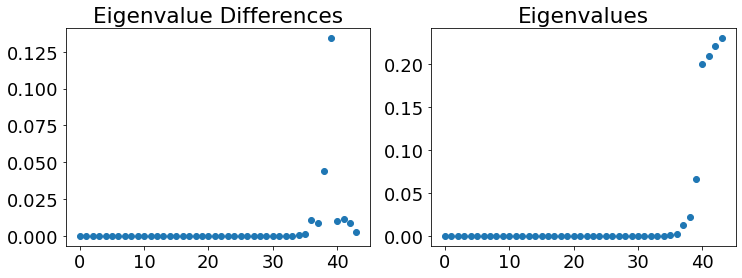

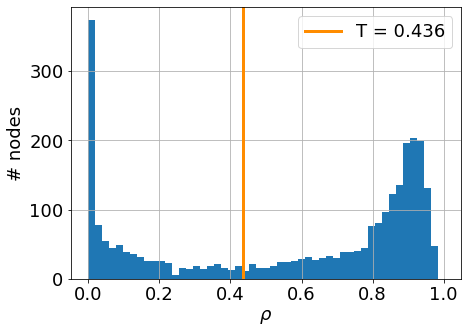

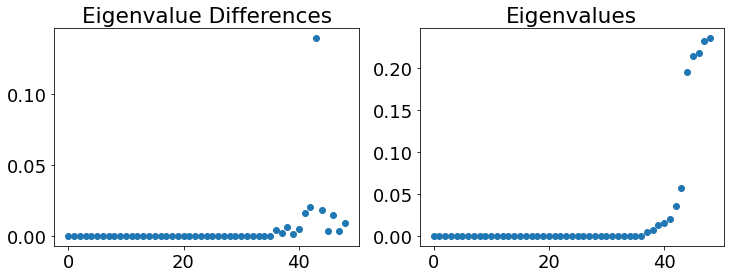

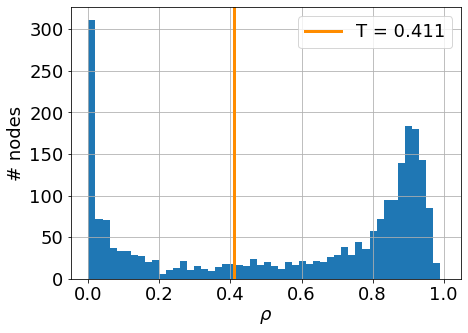

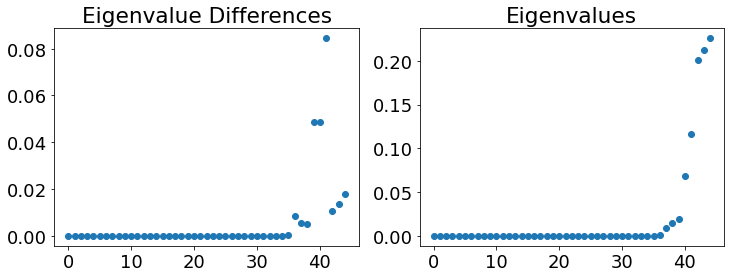

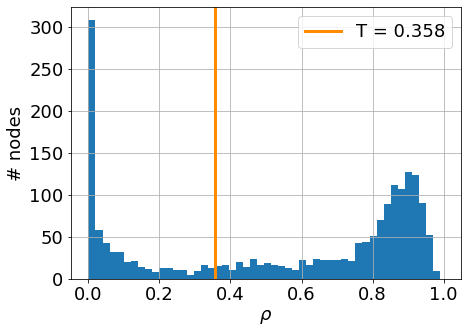

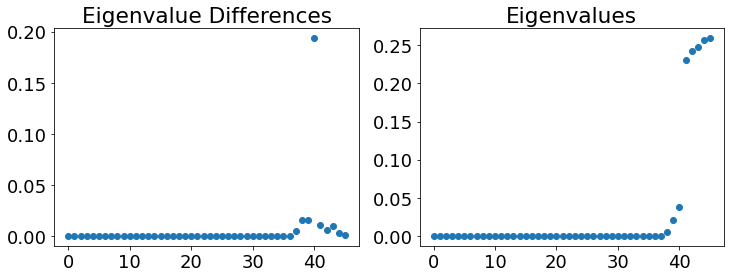

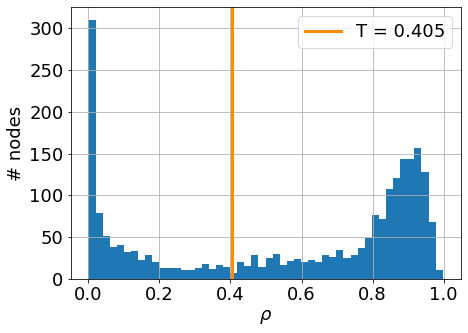

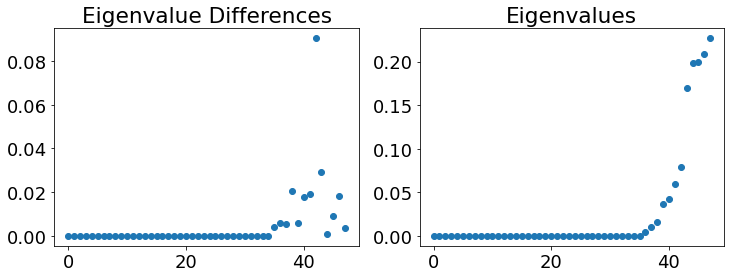

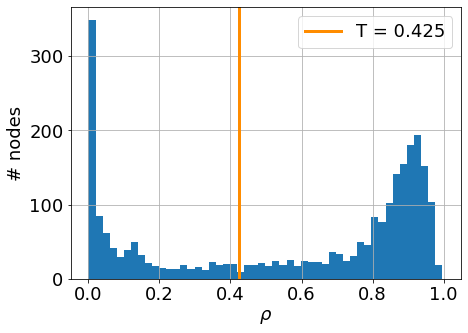

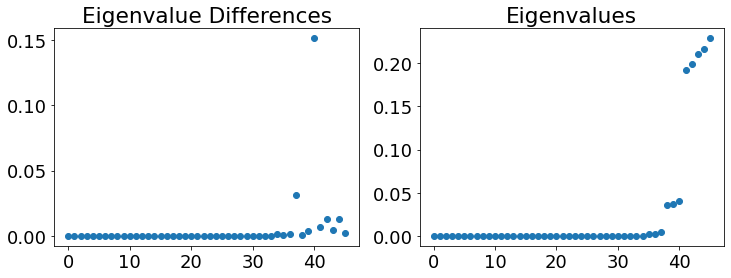

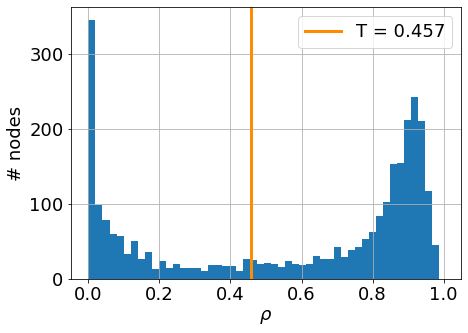

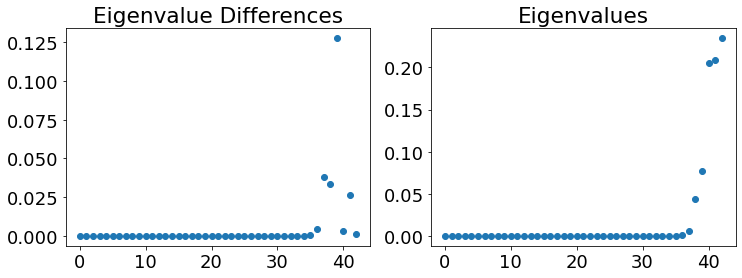

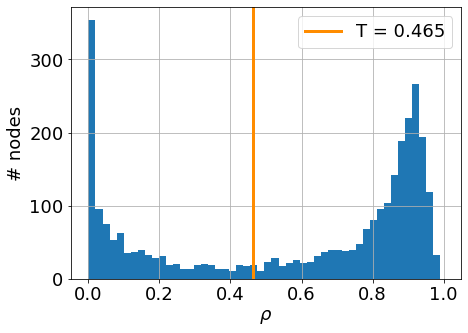

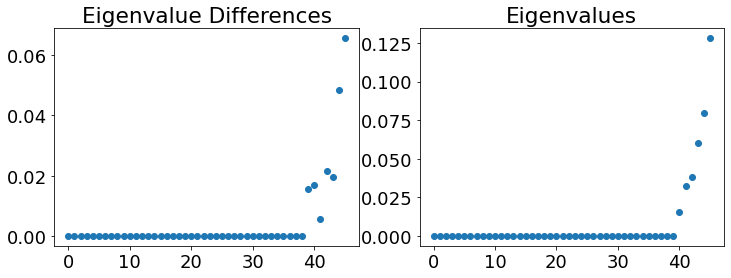

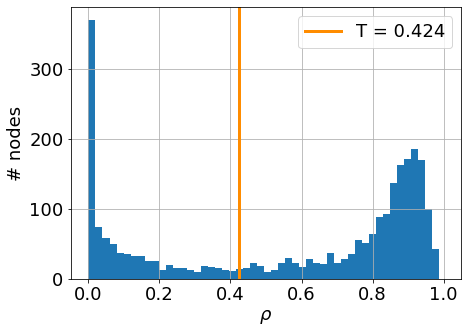

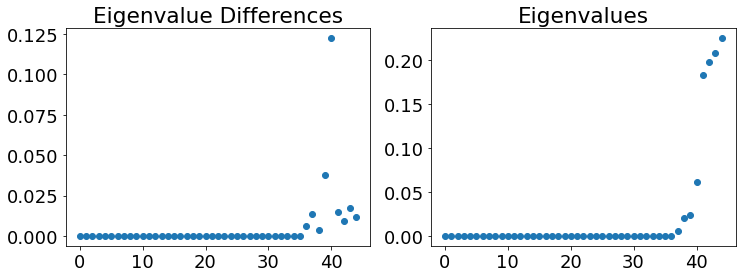

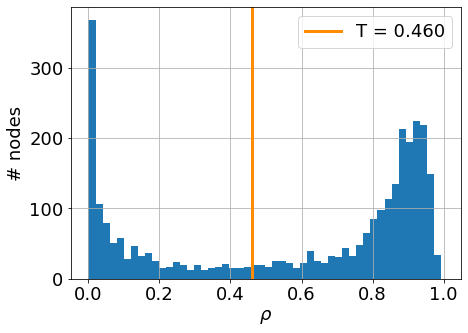

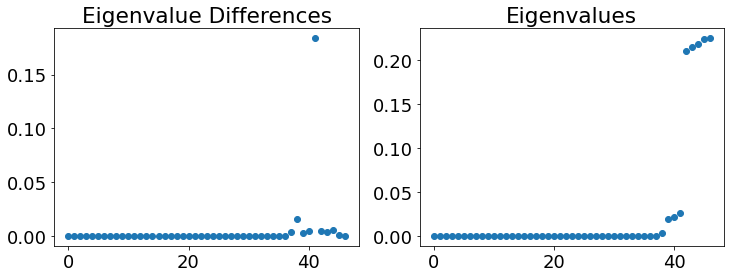

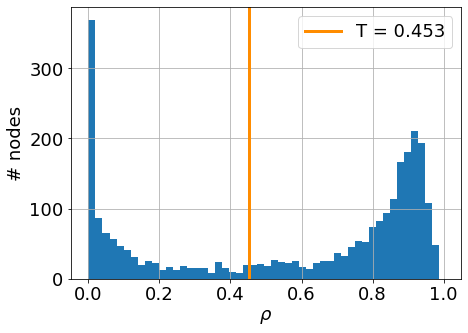

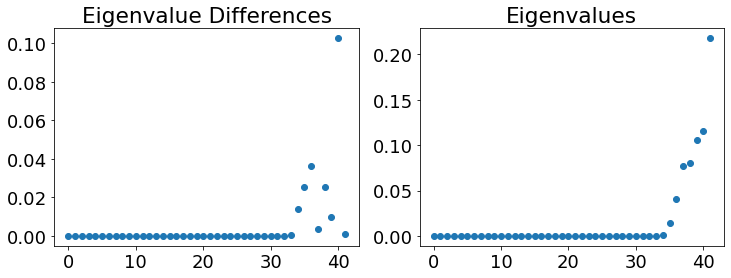

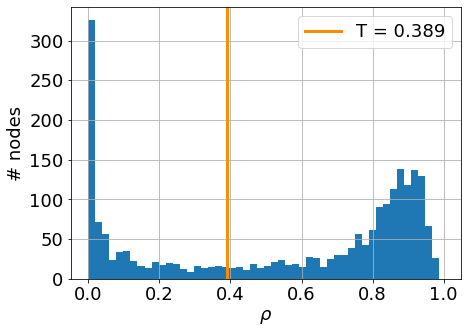

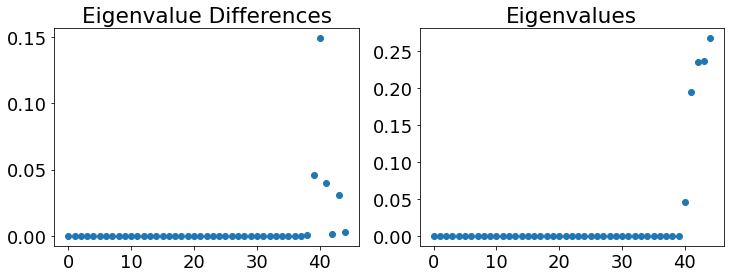

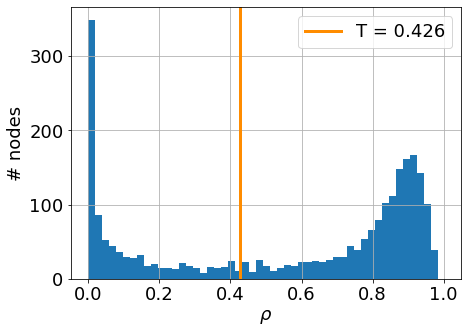

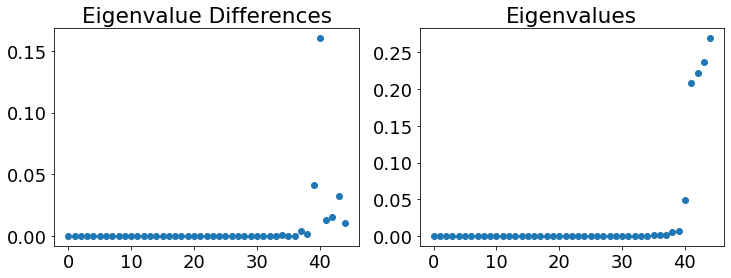

In [31]:
reading_path = general_path + 'Data/' + folders[ID] + '/'
writing_path = general_path + 'Graphic_analysis/'

for run in range(NumberOfSimulations):
    filename = 'simulated_SMLM_' + str(ID) + '_' + str(run) + '.csv'
    data = pd.read_csv(reading_path + filename)
    data = modify_cov_matrix_format(data)
    N = len(data)
    T = compute_T_95(N = len(data), ListOfCovMatrices = data['cov_matrix'], sigma_s = sigma_s)
    labels = calling_graphic(data, sigma_s, T)
    labels_clean = remove_small_clusters(labels, min_size = 5)
    # put it in a pandas dataframe to save it as a csv
    df = pd.DataFrame(labels_clean, columns = ['graphic_label'])
    df.to_csv(writing_path + 'graphic_result_' + str(ID)+ '_' + str(run)+ '.csv')

In [20]:
len(np.unique(labels_clean))

40

In [9]:
unique, counts = np.unique(labels_clean, return_counts = True)

In [10]:
counts

array([1136,   19,   20,   21,   21,   21,   22,   21,   21,   20,   20,
         20,   21,   20,   20,   20,   20,   20,   20,   19,   19,   19,
         20,   20,   20,   19,   19,   20,   19,   19,   19,   20,   19,
         19,   18,   18,   19,   18,   18,   18,   18])